# Code for Figure 5 part (b) and associated statistics reported in the text

Developed by Siobhan Powell, 2021. 

In [1]:
import os
os.chdir('../')

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.patches import Patch
from matplotlib.lines import Line2D
from matplotlib.gridspec import GridSpec
import pickle
import datetime

In [3]:
noev_scenario = pd.read_csv('Results/NoEVs_year2030_solar2.5x_wind2.5x_dpdf_20211119.csv')

In [4]:
scens1 = ['_Timers9pm_noWPcontrol', '_Timers12am_noWPcontrol', '_TimersNone_noWPcontrol', '_TimersNone_WPcontrol_minpeak', '_TimersNone_WPcontrol_avgem']
scens2 = ['UniversalHome', 'HighHome', 'LowHome_HighWork', 'LowHome_LowWork']

vals1 = np.zeros((10, 6, 5)) # overgeneration
tables_dfs1 = {penlevel: pd.DataFrame(np.zeros((6, 5)), 
                          index=['_Timers9pm_noWPcontrol', '_Timers12am_noWPcontrol', '_TimersNone_noWPcontrol', '_TimersNone_WPcontrol_minpeak', '_TimersNone_WPcontrol_avgem', '_TimersMixed_WPcontrol_minpeak'], 
                          columns=['UniversalHome', 'HighHome', 'LowHome_HighWork', 'LowHome_LowWork', 'BusinessAsUsual']) for penlevel in [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]}

vals2 = np.zeros((10, 6, 5)) # ramping
tables_dfs2 = {penlevel: pd.DataFrame(np.zeros((6, 5)), 
                          index=['_Timers9pm_noWPcontrol', '_Timers12am_noWPcontrol', '_TimersNone_noWPcontrol', '_TimersNone_WPcontrol_minpeak', '_TimersNone_WPcontrol_avgem', '_TimersMixed_WPcontrol_minpeak'], 
                          columns=['UniversalHome', 'HighHome', 'LowHome_HighWork', 'LowHome_LowWork', 'BusinessAsUsual']) for penlevel in [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]}

for i, scen1 in enumerate(scens1):
    for j, scen2 in enumerate(scens2):
        for k, penlevel in enumerate([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]):
            overgen = None
            dpdf = pd.read_csv('Results/ImpactCurves/fuel1_solar2.5_wind2.5_'+scen2+scen1+'_penlevel'+str(penlevel)+'_storagebefore_futuredemand_df_20211119.csv')
            overgen = pd.read_csv('Results/ImpactCurves/fuel1_solar2.5_wind2.5_'+scen2+scen1+'_penlevel'+str(penlevel)+'_storagebefore_overgeneration.csv')

            if overgen is not None:
                vals1[k, i, j] = np.abs(overgen.demand.sum())
                tables_dfs1[penlevel].loc[scen1, scen2] = np.abs(overgen.demand.sum())

            prof1 = np.zeros((25, ))
            prof1[np.arange(0, 24)] = dpdf['demand'].values.reshape(-1, 24).mean(axis=0) # in original 
            prof1[24] = prof1[0]
            vals2[k, i, j] = np.max(prof1[1:] - prof1[:-1])
            tables_dfs2[penlevel].loc[scen1, scen2] = np.max(prof1[1:] - prof1[:-1])
            
        k = k+1
        penlevel = 1.0
        overgen = None
        try: 
            dpdf = pd.read_csv('Results/Fuel1_Solar25_Wind25/fuel1_solar2.5_wind2.5_'+scen2+scen1+'_penlevel'+str(penlevel)+'_storagebefore_dpdf_20211119.csv')
        except:
            try:
                dpdf = pd.read_csv('Results/Fuel1_Solar25_Wind25/fuel1_solar2.5_wind2.5_'+scen2+scen1+'_penlevel'+str(penlevel)+'_storagebefore_withstorage_dpdf_20211119.csv')
            except: 
                print('Error for ', penlevel, scen1, scen2)

        try:
            overgen = pd.read_csv('Results/Fuel1_Solar25_Wind25/fuel1_solar2.5_wind2.5_'+scen2+scen1+'_penlevel'+str(penlevel)+'_storagebefore_overgeneration.csv')
        except:
            try: 
                overgen = pd.read_csv('Results/Fuel1_Solar25_Wind25/fuel1_solar2.5_wind2.5_'+scen2+scen1+'_penlevel'+str(penlevel)+'_storagebefore_withstorage_overgeneration.csv')
            except:
                print('No overgeneration for ', scen1, scen2)

        if overgen is not None:
            vals1[k, i, j] = np.abs(overgen.demand.sum())
            tables_dfs1[penlevel].loc[scen1, scen2] = np.abs(overgen.demand.sum())

        prof1 = np.zeros((25, ))
        prof1[np.arange(0, 24)] = dpdf['demand'].values.reshape(-1, 24).mean(axis=0) # in original 
        prof1[24] = prof1[0]
        vals2[k, i, j] = np.max(prof1[1:] - prof1[:-1])
        tables_dfs2[penlevel].loc[scen1, scen2] = np.max(prof1[1:] - prof1[:-1])
        
        
scen2 = 'BusinessAsUsual'
scen1 =  '_TimersMixed_WPcontrol_minpeak'
i = i+1
j = j+1
for k, penlevel in enumerate([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]):
    overgen = None
    dpdf = pd.read_csv('Results/ImpactCurves/fuel1_solar2.5_wind2.5_'+scen2+scen1+'_penlevel'+str(penlevel)+'_storagebefore_futuredemand_df_20211119.csv')
    overgen = pd.read_csv('Results/ImpactCurves/fuel1_solar2.5_wind2.5_'+scen2+scen1+'_penlevel'+str(penlevel)+'_storagebefore_overgeneration.csv')

    if overgen is not None:
        vals1[k, i, j] = np.abs(overgen.demand.sum())
        tables_dfs1[penlevel].loc[scen1, scen2] = np.abs(overgen.demand.sum())

    prof = np.zeros((25, ))
    prof[np.arange(0, 24)] = dpdf['demand'].values.reshape(-1, 24).mean(axis=0)
    prof[24] = prof[0]
    vals2[k, i, j] = np.max(prof[1:] - prof[:-1])
    tables_dfs2[penlevel].loc[scen1, scen2] = np.max(prof[1:] - prof[:-1])
    
k = k + 1
penlevel = 1.0
overgen = None
try: 
    dpdf = pd.read_csv('Results/Fuel1_Solar25_Wind25/fuel1_solar2.5_wind2.5_'+scen2+scen1+'_penlevel'+str(penlevel)+'_storagebefore_dpdf_20211119.csv')
except:
    try:
        dpdf = pd.read_csv('Results/Fuel1_Solar25_Wind25/fuel1_solar2.5_wind2.5_'+scen2+scen1+'_penlevel'+str(penlevel)+'_storagebefore_withstorage_dpdf_20211119.csv')
    except: 
        print('Error for ', penlevel, scen1, scen2)
        print('Results/Fuel1_Solar25_Wind25/fuel1_solar2.5_wind2.5_'+scen2+scen1+'_penlevel'+str(penlevel)+'_storagebefore_withstorage_dpdf_20211119.csv')

try: 
    overgen = pd.read_csv('Results/Fuel1_Solar25_Wind25/fuel1_solar2.5_wind2.5_'+scen2+scen1+'_penlevel'+str(penlevel)+'_storagebefore_overgeneration.csv')
except:
    try: 
        overgen = pd.read_csv('Results/Fuel1_Solar25_Wind25/fuel1_solar2.5_wind2.5_'+scen2+scen1+'_penlevel'+str(penlevel)+'_storagebefore_withstorage_overgeneration.csv')
    except:
        print('No overgeneration for ', scen1, scen2)        

if overgen is not None:
    vals1[k, i, j] = np.abs(overgen.demand.sum())
    tables_dfs1[penlevel].loc[scen1, scen2] = np.abs(overgen.demand.sum())

prof = np.zeros((25, ))
prof[np.arange(0, 24)] = dpdf['demand'].values.reshape(-1, 24).mean(axis=0)
prof[24] = prof[0]
vals2[k, i, j] = np.max(prof[1:] - prof[:-1])
tables_dfs2[penlevel].loc[scen1, scen2] = np.max(prof[1:] - prof[:-1])      




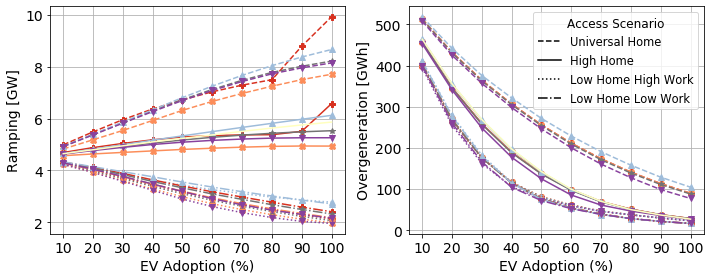

In [5]:
plt.figure(figsize=(10, 4))
colors = ['#d7301f', '#fc8d59', '#737373', '#9ebcda', '#88419d']
lines = ['--', '-', ':', '-.']
markers=['P', 'X', '*', '^', 'v']
plt.subplot(121)
for idx_access in range(4):
    for idx_control in range(5):
        plt.plot(100*np.arange(0.1, 1.05, 0.1), (1/1000)*vals2[:, idx_control, idx_access], lines[idx_access]+markers[idx_control], color=colors[idx_control])
plt.plot(100*np.arange(0.1, 1.05, 0.1), (1/1000)*vals2[:, 5, 4], lines[1], color='#ffffbf')
plt.xticks(100*np.arange(0.1, 1.05, 0.1), fontsize=14)
plt.xlabel('EV Adoption (%)', fontsize=14)
plt.gca().set_axisbelow(True)        
plt.gca().grid()
plt.yticks(np.arange(2, 11, 2), fontsize=14)
plt.ylabel('Ramping [GW]', fontsize=14)

plt.subplot(122)

for idx_access in range(4):
    for idx_control in range(5):
        plt.plot(100*np.arange(0.1, 1.05, 0.1), (1/1000)*vals1[:, idx_control, idx_access], lines[idx_access]+markers[idx_control], color=colors[idx_control])
plt.plot(100*np.arange(0.1, 1.05, 0.1), (1/1000)*vals1[:, 5, 4], lines[1], color='#ffffbf')
plt.xticks(100*np.arange(0.1, 1.05, 0.1), fontsize=14)
plt.xlabel('EV Adoption (%)', fontsize=14)
plt.ylabel('Overgeneration [GWh]', fontsize=14)
plt.yticks(fontsize=14)
plt.gca().set_axisbelow(True)        
plt.gca().grid()


scens2 = ['Universal Home', 'High Home', 'Low Home High Work', 'Low Home Low Work']
legend_elements = [Line2D([0], [0], marker=None, color='k', 
                          label=scens2[j], linestyle=lines[j], markerfacecolor=colors[2]) for j in range(4)]
legend = plt.legend(handles=legend_elements, loc='upper right', fontsize=11.5, title='Access Scenario')
plt.setp(legend.get_title(),fontsize=12)

plt.tight_layout()
plt.savefig('MainPlotting/Plots/fig5b.pdf', bbox_inches='tight')

plt.show()


In [11]:
print('BAU overgen at 20%:', ((1/1000)*tables_dfs1[0.2]).round(2).loc['_TimersMixed_WPcontrol_minpeak', 'BusinessAsUsual'])
print('BAU overgen at 50%:', ((1/1000)*tables_dfs1[0.5]).round(2).loc['_TimersMixed_WPcontrol_minpeak', 'BusinessAsUsual'])
print('BAU overgen at 100%:', ((1/1000)*tables_dfs1[1.0]).round(2).loc['_TimersMixed_WPcontrol_minpeak', 'BusinessAsUsual'])

BAU overgen at 20%: 355.64
BAU overgen at 50%: 142.37
BAU overgen at 100%: 27.11


In [15]:
print('Universal home overgen at 100%:')
((1/1000)*tables_dfs1[1.0]).round(2)['UniversalHome']
# print('BAU overgen at 50%:', ((1/1000)*tables_dfs1[0.5]).round(2).loc['_TimersMixed_WPcontrol_minpeak', 'BusinessAsUsual'])
# print('BAU overgen at 100%:', ((1/1000)*tables_dfs1[1.0]).round(2).loc['_TimersMixed_WPcontrol_minpeak', 'BusinessAsUsual'])

Universal home overgen at 100%:


_Timers9pm_noWPcontrol             89.74
_Timers12am_noWPcontrol            89.73
_TimersNone_noWPcontrol            88.13
_TimersNone_WPcontrol_minpeak     104.65
_TimersNone_WPcontrol_avgem        77.26
_TimersMixed_WPcontrol_minpeak      0.00
Name: UniversalHome, dtype: float64

In [17]:
print('Uncontrolled overgen fraction universal home over bau: ', tables_dfs1[1.0].loc['_TimersNone_noWPcontrol', 'UniversalHome']/tables_dfs1[1.0].loc['_TimersMixed_WPcontrol_minpeak', 'BusinessAsUsual'])

Uncontrolled overgen fraction universal home over bau:  3.251403820519647


In [22]:
print('Max savings overgeneration: ')
1 - (tables_dfs1[1.0].max()['LowHome_LowWork'] / tables_dfs1[1.0].max()['UniversalHome'] )

Max savings overgeneration: 


0.840359949939402

In [29]:
print('Max savings ramping: ')
# tables_dfs2[1.0].max()
1 - (tables_dfs2[1.0].max()['LowHome_LowWork'] / tables_dfs2[1.0].max()['UniversalHome'] )

Max savings ramping: 


0.7270326745275291